In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

(array([996.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.000000e+00, 1.572090e+04, 3.144080e+04, 4.716070e+04,
        6.288060e+04, 7.860050e+04, 9.432040e+04, 1.100403e+05,
        1.257602e+05, 1.414801e+05, 1.572000e+05]),
 <BarContainer object of 10 artists>)

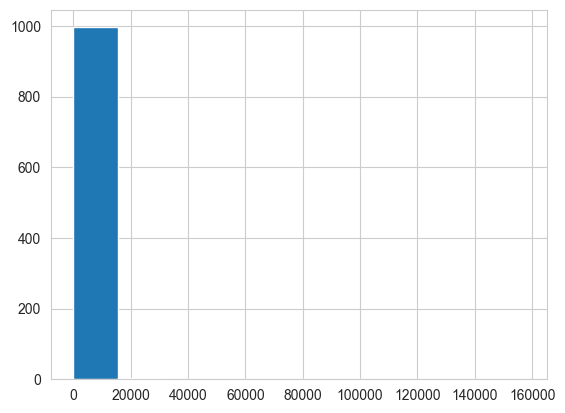

In [10]:
rng = np.random.default_rng(1000)

a = 1.5
n = 1000
s = rng.zipf(a, n)

plt.hist(s, bins=10)

In [11]:
from sqlalchemy import create_engine

db = "../../data/sqlite.db"

engine = create_engine(f"sqlite:///{db}", echo=True)

2023-11-26 18:56:58,408 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-26 18:56:58,409 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("
    SELECT
    empire_id,
    count(planet_id) as num_habitable_planets
    FROM empire
    LEFT JOIN star_system ON empire_id = empire_owner
    LEFT JOIN main.planet p on star_system.star_system_id = p.planet_star_system
    LEFT JOIN main.biome b on p.planet_biome = b.biome_id
    WHERE b.biome_is_habitable = true
    GROUP BY empire_id
    ORDER BY num_habitable_planets DESC;
    ")
2023-11-26 18:56:58,409 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-11-26 18:56:58,410 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("
    SELECT
    empire_id,
    count(planet_id) as num_habitable_planets
    FROM empire
    LEFT JOIN star_system ON empire_id = empire_owner
    LEFT JOIN main.planet p on star_system.star_system_id = p.planet_star_system
    LEFT JOIN main.biome b on p.planet_biome = b.biome_id
    WHERE b.biome_is_habitable = 

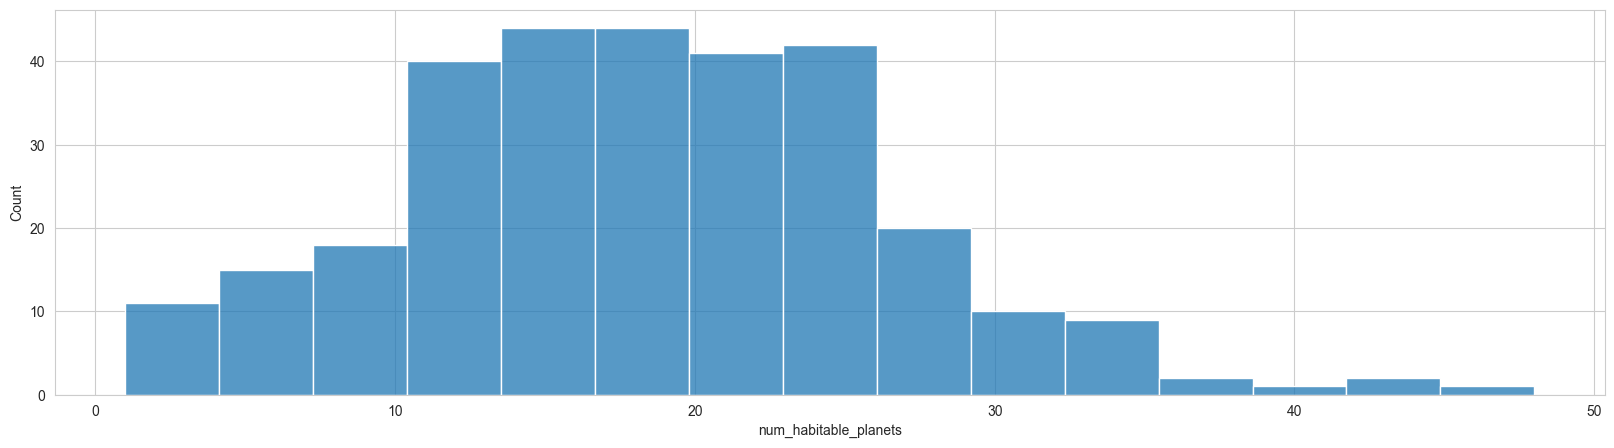

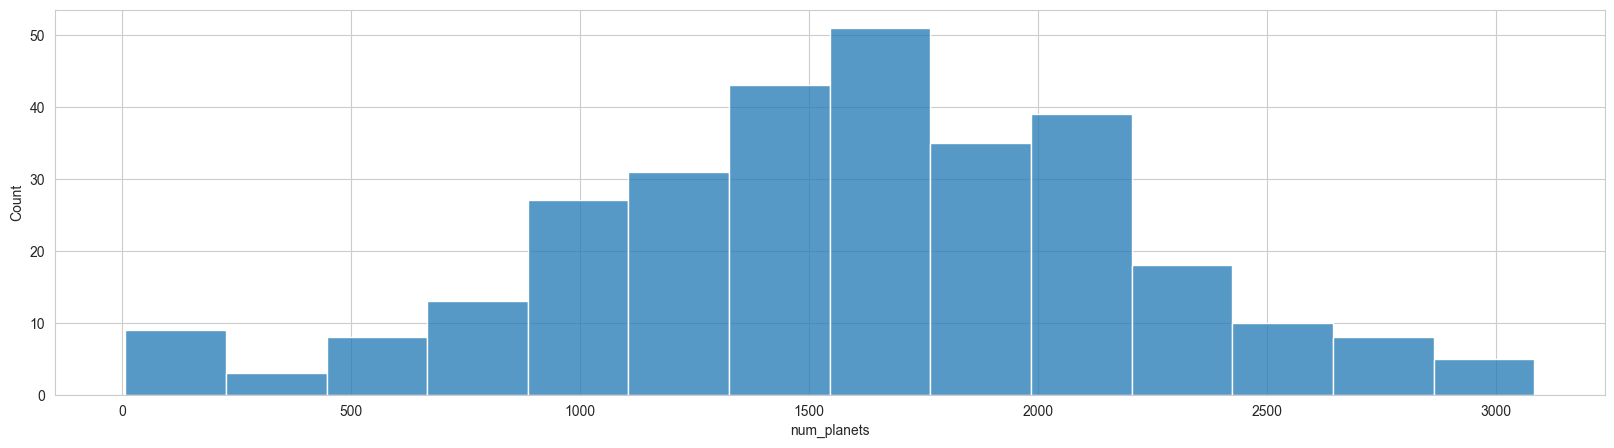

In [15]:
from src.models import Empire, StarSystem, Planet, Biome
from sqlalchemy import select, func


# plot empire id and number of habitable planets

def plot_empire_num_habitable_planets():
    stmt = """
    SELECT
    empire_id,
    count(planet_id) as num_habitable_planets
    FROM empire
    LEFT JOIN star_system ON empire_id = empire_owner
    LEFT JOIN main.planet p on star_system.star_system_id = p.planet_star_system
    LEFT JOIN main.biome b on p.planet_biome = b.biome_id
    WHERE b.biome_is_habitable = true
    GROUP BY empire_id
    ORDER BY num_habitable_planets DESC;
    """
    df = pd.read_sql(stmt, engine)

    # plot
    plt.figure(figsize=(20, 5))
    # sns.barplot(x="empire_id", y="num_habitable_planets", data=df)

    sns.histplot(x="num_habitable_planets", data=df)


def plot_empire_num_planets():
    stmt = """
    SELECT
    empire_id,
    count(planet_id) as num_planets
    FROM empire
    LEFT JOIN star_system ON empire_id = empire_owner
    LEFT JOIN main.planet p on star_system.star_system_id = p.planet_star_system
    GROUP BY empire_id
    ORDER BY num_planets DESC;
    """
    df = pd.read_sql(stmt, engine)

    # plot
    plt.figure(figsize=(20, 5))
    sns.histplot(x="num_planets", data=df)


plot_empire_num_habitable_planets()
plot_empire_num_planets()

In [21]:
from src.factories.planet_resources import add_empire_resources
from src.factories.empires_util import empires_info

empires = empires_info(engine)
add_empire_resources(empires, engine)

empires.head()

Calculating total empire resources
2023-11-27 11:06:48,798 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-27 11:06:48,798 INFO sqlalchemy.engine.Engine SELECT empire.empire_id, sum(planet.planet_energy_value) AS total_energy, sum(planet.planet_minerals_value) AS total_minerals, sum(planet.planet_research_value) AS total_research, sum(planet.planet_trade_value) AS total_trade 
FROM empire JOIN star_system ON empire.empire_id = star_system.empire_owner JOIN planet ON star_system.star_system_id = planet.planet_star_system GROUP BY empire.empire_id
2023-11-27 11:06:48,798 INFO sqlalchemy.engine.Engine [generated in 0.00075s] ()
2023-11-27 11:06:48,801 INFO sqlalchemy.engine.Engine ROLLBACK


,empire_id,empire_authority_id,empire_ethic_id,empire_ethic_attraction,total_energy,total_minerals,total_research,total_trade
0,1,2,"[2, 8]","[1, 2]",145,323,123,498
1,2,5,"[2, 7]","[1, 2]",3260,1464,863,5145
2,3,2,"[5, 6, 8]","[1, 1, 1]",625,289,87,568
3,4,1,"[3, 4, 6]","[1, 1, 1]",94,222,70,453
4,5,6,"[1, 5]","[1, 2]",77,362,58,359


In [26]:
pd.cut(empires["total_energy"], bins=10, labels=range(1, 11)).astype(int) + pd.cut(
    empires["total_minerals"], bins=10, labels=range(1, 11)
).astype(int) + pd.cut(empires["total_research"], bins=10, labels=range(1, 11)).astype(int)

0      3
1     19
2      4
3      3
4      3
5      3
6      3
7      4
8      8
9      8
10    24
11     8
12     4
13     8
14     4
15     4
16     3
17    30
18     4
19    12
20     4
21    13
22     4
23    13
24     9
25     3
26    14
27     3
28    13
29     3
dtype: int64